# Netflix assignment

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pandasql

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta, binom

## Load data

In [2]:
d = {'Team': ['Horror Movies', 'Reality TV'], 'ID': [23553, 86452], 'Launch_Date': ['2017-09-08', '2019-02-21']}
movies = pd.DataFrame(data=d, columns = ['Team', 'ID', 'Launch_Date'])
movies

,Team,ID,Launch_Date
0,Horror Movies,23553,2017-09-08
1,Reality TV,86452,2019-02-21


In [3]:
movies['Launch_Date'] = pd.to_datetime(movies['Launch_Date'])

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Team         2 non-null      object        
 1   ID           2 non-null      int64         
 2   Launch_Date  2 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 176.0+ bytes


In [5]:
movies.dtypes

Team                   object
ID                      int64
Launch_Date    datetime64[ns]
dtype: object

In [6]:
d = {'ID': [86452, 23553], 'Watch_Time(minutes)': [75.2, 20.4], 'Rating': [9, 5]}
feature_details = pd.DataFrame(data=d, columns = ['ID', 'Watch_Time(minutes)', 'Rating'])
feature_details

,ID,Watch_Time(minutes),Rating
0,86452,75.2,9
1,23553,20.4,5


In [7]:
feature_details['Watch_Time(minutes)'].astype(float)

0    75.2
1    20.4
Name: Watch_Time(minutes), dtype: float64

In [8]:
feature_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2 non-null      int64  
 1   Watch_Time(minutes)  2 non-null      float64
 2   Rating               2 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 176.0 bytes


## Add data

In [9]:
movies_add = movies.append([pd.Series(['Horror Movies', 12345, '2019-01-01'], index = movies.columns)
                            , pd.Series(['Reality TV', 67890, '2019-02-01'], index = movies.columns)
                            , pd.Series(['Reality TV', 23456, '2019-03-01'], index = movies.columns)
                            , pd.Series(['Reality TV', 34567, '2019-04-01'], index = movies.columns)
                            , pd.Series(['Reality TV', 45678, '2019-05-01'], index = movies.columns)
                            , pd.Series(['Horror Movies', 56789, '2019-06-01'], index = movies.columns)
                            , pd.Series(['Action', 11111, '2019-07-01'], index = movies.columns)
                            , pd.Series(['Action', 22222, '2019-08-01'], index = movies.columns)
                            , pd.Series(['Action', 33333, '2019-09-01'], index = movies.columns)], 
                           ignore_index = True)

movies_add['Launch_Date'] = pd.to_datetime(movies_add['Launch_Date'])
movies_add.dtypes

Team                   object
ID                      int64
Launch_Date    datetime64[ns]
dtype: object

In [10]:
movies_add

,Team,ID,Launch_Date
0,Horror Movies,23553,2017-09-08
1,Reality TV,86452,2019-02-21
2,Horror Movies,12345,2019-01-01
3,Reality TV,67890,2019-02-01
4,Reality TV,23456,2019-03-01
5,Reality TV,34567,2019-04-01
6,Reality TV,45678,2019-05-01
7,Horror Movies,56789,2019-06-01
8,Action,11111,2019-07-01
9,Action,22222,2019-08-01


In [11]:
feature_details_add = feature_details.append([pd.Series([12345, 30.0, 7], index = feature_details.columns)
                                             , pd.Series([67890, 45.6, 8], index = feature_details.columns)
                                             , pd.Series([23456, 122.6, 2], index = feature_details.columns)
                                             , pd.Series([34567, 97.1, 4], index = feature_details.columns)
                                             , pd.Series([45678, 89.7, 5], index = feature_details.columns)
                                             , pd.Series([56789, 90.2, 1], index = feature_details.columns)
                                             , pd.Series([11111, 220.5, 2], index = feature_details.columns)
                                             , pd.Series([22222, 120.6, 3], index = feature_details.columns)
                                             , pd.Series([33333, 180.2, 6], index = feature_details.columns)]
                                             , ignore_index = True)

feature_details_add['ID'] = feature_details_add['ID'].astype(int)
feature_details_add['Rating'] = feature_details_add['Rating'].astype(int)
feature_details_add.dtypes

ID                       int64
Watch_Time(minutes)    float64
Rating                   int64
dtype: object

In [12]:
feature_details_add

,ID,Watch_Time(minutes),Rating
0,86452,75.2,9
1,23553,20.4,5
2,12345,30.0,7
3,67890,45.6,8
4,23456,122.6,2
5,34567,97.1,4
6,45678,89.7,5
7,56789,90.2,1
8,11111,220.5,2
9,22222,120.6,3


## Save data

In [13]:
movies_add.to_csv("movies_add", index = False)
feature_details_add.to_csv("feature_details_add", index = False)

# Question 1 -- SQL

SQL query that returns running average of ratings for each team, order by launch date

In [14]:
"""
SELECT team
, launch_date
, m.id
, rating
, AVG(rating) OVER (PARTITION BY team ORDER BY launch_date) AS running_avg_rating
FROM netflix.movies_add AS m
LEFT JOIN netflix.feature_details_add AS f
ON m.id = f.id
""" ;

In [14]:
results = pd.read_csv("netflix-question1-results.csv")
results

,team,launch_date,id,rating,running_avg_rating
0,Action,2019-07-01,11111,2,2.000000
1,Action,2019-08-01,22222,3,2.500000
2,Action,2019-09-01,33333,6,3.666667
3,Horror Movies,2017-09-08,23553,5,5.000000
4,Horror Movies,2019-01-01,12345,7,6.000000
5,Horror Movies,2019-06-01,56789,1,4.333333
6,Reality TV,2019-02-01,67890,8,8.000000
7,Reality TV,2019-02-21,86452,9,8.500000
8,Reality TV,2019-03-01,23456,2,6.333333
9,Reality TV,2019-04-01,34567,4,5.750000


# Question 2 -- Python/R

a) Divides watch_time into "Long" / "Short" buckets, and labels which bucket each piece of content falls into

Justify your choice of what is "Long" versus "Short". Feel free to divide into more than two buckets, if justifiable and useful.

In [15]:
"""
I compared the mean watch time (99.3 min) to the median watch time (90.2 min),
and classified each ID based on the median as the delineation to separate content into Long vs Short categories. 
The reason I used the median was to remove the impact of very short or very long films that may skew the average.

The distribution of watch times also showed a natural break between movies that were under 100min,
and those that were over 100min.
""" ;

In [16]:
"""
Alternatively, an average movie based on user experience might be expected around 90-120minutes. 
Given anything below could be considered short, and anything above considered long, 
the 90-120min bucket could be considered standard. 
Choosing buckets based on the distribution of watch times based on the 25th, 50th, 
and 75th percentiles would allow for more granular segmentation. 

For example, content less than the 25th percentile (less than 60min) could be very short, 
between 25-50th percentile (60-90min) could be short, 
between 50-75th percentile (90-122min) as standard, 
between 75-90th percentile (122-180min) could be long, 
and any movies above 90th percentile (more than 180min) could be very long.
""" ;

In [17]:
feature_details_add

,ID,Watch_Time(minutes),Rating
0,86452,75.2,9
1,23553,20.4,5
2,12345,30.0,7
3,67890,45.6,8
4,23456,122.6,2
5,34567,97.1,4
6,45678,89.7,5
7,56789,90.2,1
8,11111,220.5,2
9,22222,120.6,3


In [18]:
feature_details_add['Watch_Time(minutes)'].describe()

count     11.000000
mean      99.281818
std       60.747705
min       20.400000
25%       60.400000
50%       90.200000
75%      121.600000
max      220.500000
Name: Watch_Time(minutes), dtype: float64

In [19]:
print('10th percentile:', feature_details_add['Watch_Time(minutes)'].quantile(0.1)
      , ','
      , '90th percentile:', feature_details_add['Watch_Time(minutes)'].quantile(0.9))

10th percentile: 30.0 , 90th percentile: 180.2


In [20]:
feature_details_add['Watch_Time(minutes)'].median()

90.2

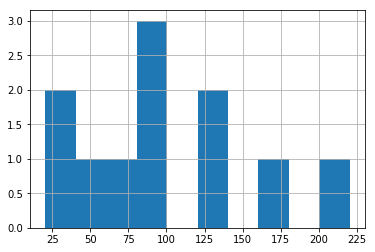

In [21]:
feature_details_add['Watch_Time(minutes)'].hist();

In [22]:
feature_details_add['Watch_Time(bucket_binary)'] = ['Long' if wt > 90.2 else 'Short' for wt in feature_details_add['Watch_Time(minutes)']]
feature_details_add

,ID,Watch_Time(minutes),Rating,Watch_Time(bucket_binary)
0,86452,75.2,9,Short
1,23553,20.4,5,Short
2,12345,30.0,7,Short
3,67890,45.6,8,Short
4,23456,122.6,2,Long
5,34567,97.1,4,Long
6,45678,89.7,5,Short
7,56789,90.2,1,Short
8,11111,220.5,2,Long
9,22222,120.6,3,Long


b) Find running average for each of these buckets

In [23]:
joinedDF = pd.merge(left=movies_add, right=feature_details_add, how='left', on='ID')
joinedDF

,Team,ID,Launch_Date,Watch_Time(minutes),Rating,Watch_Time(bucket_binary)
0,Horror Movies,23553,2017-09-08,20.4,5,Short
1,Reality TV,86452,2019-02-21,75.2,9,Short
2,Horror Movies,12345,2019-01-01,30.0,7,Short
3,Reality TV,67890,2019-02-01,45.6,8,Short
4,Reality TV,23456,2019-03-01,122.6,2,Long
5,Reality TV,34567,2019-04-01,97.1,4,Long
6,Reality TV,45678,2019-05-01,89.7,5,Short
7,Horror Movies,56789,2019-06-01,90.2,1,Short
8,Action,11111,2019-07-01,220.5,2,Long
9,Action,22222,2019-08-01,120.6,3,Long


In [24]:
joinedDF.sort_values(['Watch_Time(bucket_binary)', 'Launch_Date'], inplace=True)
joinedDF

,Team,ID,Launch_Date,Watch_Time(minutes),Rating,Watch_Time(bucket_binary)
4,Reality TV,23456,2019-03-01,122.6,2,Long
5,Reality TV,34567,2019-04-01,97.1,4,Long
8,Action,11111,2019-07-01,220.5,2,Long
9,Action,22222,2019-08-01,120.6,3,Long
10,Action,33333,2019-09-01,180.2,6,Long
0,Horror Movies,23553,2017-09-08,20.4,5,Short
2,Horror Movies,12345,2019-01-01,30.0,7,Short
3,Reality TV,67890,2019-02-01,45.6,8,Short
1,Reality TV,86452,2019-02-21,75.2,9,Short
6,Reality TV,45678,2019-05-01,89.7,5,Short


In [25]:
partition = lambda x: x.rolling(10, 1).mean()
partition

<function __main__.<lambda>>

In [26]:
joinedDF['running_avg_rating'] = joinedDF.groupby('Watch_Time(bucket_binary)')['Rating'].transform(partition)
joinedDF

,Team,ID,Launch_Date,Watch_Time(minutes),Rating,Watch_Time(bucket_binary),running_avg_rating
4,Reality TV,23456,2019-03-01,122.6,2,Long,2.000000
5,Reality TV,34567,2019-04-01,97.1,4,Long,3.000000
8,Action,11111,2019-07-01,220.5,2,Long,2.666667
9,Action,22222,2019-08-01,120.6,3,Long,2.750000
10,Action,33333,2019-09-01,180.2,6,Long,3.400000
0,Horror Movies,23553,2017-09-08,20.4,5,Short,5.000000
2,Horror Movies,12345,2019-01-01,30.0,7,Short,6.000000
3,Reality TV,67890,2019-02-01,45.6,8,Short,6.666667
1,Reality TV,86452,2019-02-21,75.2,9,Short,7.250000
6,Reality TV,45678,2019-05-01,89.7,5,Short,6.800000


c) (Optional) Find some other metric / another quick analysis to related watch time to ratings.

Justify why it would be useful.

In [27]:
"""
Within each team, I can look at the number of movies and rank them by the watch time. 
This can be used to see if ratings show a trend based on the relative length of the movie 
and could reflect if user preference for movie lengths is changing over time. 
If there are outlier ratings within a rank, 
perhaps certain genres (Team) lend themselves to longer or shorter formats as determined by rating.
""" ;

In [28]:
joinedDF = joinedDF[['Team', 'ID', 'Launch_Date', 'Watch_Time(minutes)', 'Rating']]
joinedDF

,Team,ID,Launch_Date,Watch_Time(minutes),Rating
4,Reality TV,23456,2019-03-01,122.6,2
5,Reality TV,34567,2019-04-01,97.1,4
8,Action,11111,2019-07-01,220.5,2
9,Action,22222,2019-08-01,120.6,3
10,Action,33333,2019-09-01,180.2,6
0,Horror Movies,23553,2017-09-08,20.4,5
2,Horror Movies,12345,2019-01-01,30.0,7
3,Reality TV,67890,2019-02-01,45.6,8
1,Reality TV,86452,2019-02-21,75.2,9
6,Reality TV,45678,2019-05-01,89.7,5


In [29]:
joinedDF["Watch_Time(rank)"] = joinedDF.groupby('Team')["Watch_Time(minutes)"].rank("dense", ascending=False)
joinedDF.sort_values(['Watch_Time(rank)', 'Launch_Date'], inplace = True)
joinedDF

/Users/chelen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/chelen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Team,ID,Launch_Date,Watch_Time(minutes),Rating,Watch_Time(rank)
4,Reality TV,23456,2019-03-01,122.6,2,1.0
7,Horror Movies,56789,2019-06-01,90.2,1,1.0
8,Action,11111,2019-07-01,220.5,2,1.0
2,Horror Movies,12345,2019-01-01,30.0,7,2.0
5,Reality TV,34567,2019-04-01,97.1,4,2.0
10,Action,33333,2019-09-01,180.2,6,2.0
0,Horror Movies,23553,2017-09-08,20.4,5,3.0
6,Reality TV,45678,2019-05-01,89.7,5,3.0
9,Action,22222,2019-08-01,120.6,3,3.0
1,Reality TV,86452,2019-02-21,75.2,9,4.0


In [30]:
joinedDF['running_avg_rating_by_rank'] = joinedDF.groupby('Watch_Time(rank)')['Rating'].transform(partition)
joinedDF

,Team,ID,Launch_Date,Watch_Time(minutes),Rating,Watch_Time(rank),running_avg_rating_by_rank
4,Reality TV,23456,2019-03-01,122.6,2,1.0,2.000000
7,Horror Movies,56789,2019-06-01,90.2,1,1.0,1.500000
8,Action,11111,2019-07-01,220.5,2,1.0,1.666667
2,Horror Movies,12345,2019-01-01,30.0,7,2.0,7.000000
5,Reality TV,34567,2019-04-01,97.1,4,2.0,5.500000
10,Action,33333,2019-09-01,180.2,6,2.0,5.666667
0,Horror Movies,23553,2017-09-08,20.4,5,3.0,5.000000
6,Reality TV,45678,2019-05-01,89.7,5,3.0,5.000000
9,Action,22222,2019-08-01,120.6,3,3.0,4.333333
1,Reality TV,86452,2019-02-21,75.2,9,4.0,9.000000


# Question 3 -- Insights

The finance team would like to get information on when payments are due and need an automated way to identify anomalies in the system. Please build a dashboard in your choice of tool which solves for the above.

Please try to think about the primary metrics that is needed by the finance team and incorporate it in the dashboard and what other metrics you thought of but rejected in favor of those selected and why.

SEE HERE: [Dashboard link](https://public.tableau.com/profile/helen2020#!/vizhome/Netflixassignment-Q3/FinanceDashboard)

In [31]:
"""
Below are metrics included in my dashboard and my reasoning:

A. Metrics that show when payments are due:
These are calculated based on the due dates for each amount, for which there are multiple per ID.

    1. Unique ID volume and Running Average of Unique ID volume: 
        to see the volume of orders that require payment in each month,
        and if the average number of orders per month shows an increasing or decreasing trend.
    
    2. Amount in $ and Running Average of Amount in $: 
        to see the dollars paid in each month, normalized to US $,
        and if the average dollars paid per month shows a trend.
    
    3. Running sum of Unique ID volume and Running sum of Amount in $: 
        to see the cumulative number of orders with payments due and total dollars paid in each month.

B. Metrics that show outstanding payments due:
These are calculated based on the Latest due date per ID, when the fee is (ideally) paid in full.

    4. Running Sum of Total Amount paid and Running Sum of Total Fee $:
        to see what the overall amount that has been paid,
        and the total fee due over the past 2 years is on a monthly basis.
    
    5. Running Sum of Total Outstanding Fee $:
        to see how much the cumulative amount owed over the past 2 years on a monthly basis
        (difference between Total Amount paid and Total Fee $)
        This shows October 2017 - January 2018 saw a high increase in the amount of dollars owed on many IDs.
    
    6. Total Fee $ Fulfillment rate and ID Fulfillment rate:
        to determine what percentage of the fees due each month have been paid,
        and what percentage of IDs have been paid in full on time.
    
    7. Unique ID volume and % of Unique ID volume:
        to show the number of IDs and the share of total ID volume that have a final payment due in a given month.
        This differs from #1 by only counting IDs in the month of last payment due.

C. Metrics that show anomalies:
These are calculated to make clear which IDs and vendors have high discrepancies between fees and paid amounts.

    8. Delta $ per ID and Fee $ per ID:
        to see the difference between total Amount $ paid (sum of amounts) and Fee $ for a given ID.
    
    9. Average Fee $ per ID and Average Outstanding Amount:Fee $ Ratio:
        to see the average fee across IDs and average amount owed across all IDS per vendor 
        to understand and compare vendor size.
    
    10. % of Total Outstanding Fee:
        to see what share of the total fee owed to the business is due to a specific vendor.
        
In the dashboard link, more detail is in these tabs: "Amounts Due", "Fee Fulfillment", "IDs by Amounts Owed", 
and "Vendors by Fee Owed".
""" ;

In [32]:
"""
Here are a few metrics I thought of and rejected in favor of the ones on the dashboard and why:

While these metrics were interesting (#1, 3), visually appealing (#4, 5), 
and provided more information about the business (#2, 6, & 7), 
they were not as informative in displaying trends or as sensitive to specific cases 
that the finance team could immediately identify and act on.

1. Distribution of Total Amount paid and Distribution of Fees:
    These distributions showed a similar overall shape with a long tail skew right,
    so it didn’t seem like there were huge discrepancies.

2. % of IDs that have a payment due date prior to start date:
    There didn’t seem to be a trend as to whether more IDs required an upfront payment over time, 
    or a correlation between having an upfront payment and full fee fulfillment.

3. Number of Payments to full Fee: 
    The amount distribution is not necessarily divided evenly over the number of payments,
    and some IDs require payments before service start while others do not.

4. Waterfall of Total Amount paid vs Total Fee sum: 
    This visualization would be more effective if comparing costs to profits,
    rather than for identifying outstanding accounts and payment amounts.

5. Distribution of Amount outstanding : Fee Ratio:
    To see whether certain vendors consistently owe more on payments across all IDs purchased,
    or if there are a few IDs with large fees that require payment. 
    Ultimately the scatterplot was more effective in visually representing anomalies.

6. Top Vendors by Fee / ID volume:
    This was meant to show if any vendors made up a larger share of voice of the fees due or number of IDs, 
    and ultimately was summarized by % of Total ID volume and Average Fee per Id metrics.

7. Breakdown of $ Amount paid by currency:
    I wanted to see what the share of voice was by company to see if any one area was growing particularly. 
    There were no significant trends over the past 2 years.
    
In the dashboard link, more detail is in these tabs: "Total Amt paid distribution", "Fee distribution", 
"Prepay IDs", "ID volume and Payment delta distribution", "Vendor Ex. Running Sum of Amt", "Waterfall sample", 
"Outstanding Amt: Total Fee Ratio", "Top Vendors by Fee / ID volume", and "Breakdown of $ Amount paid".
""" ;